# **Energy Consumption Forecast**

### **Task**:

The objective of this project is to build and evaluate predictive models for Forecasting of Energy Consumption of each hour of Spain using historical data.

We trained and compared multiple machine learning and deep learning models including KNN, Random Forest, Gradient Boosting, XGBoost and LSTM to forecast the target variable.

### **Dataset:**

This project uses two different datasets sourced from Kaggle, which were later merged using a common column "*time*" and "*dt_iso*".

*   **Dataset 1**: contained information about electricity load/demand and energy generation sources (solar, wind, hydro, fossil, nuclear, etc.).
*   **Dataset 2**: contained weather and environmental variables such as temperature, humidity, wind speed, and other meteorological factors.

The merged dataset resulted in a combined time series with *~178K+ rows* and *48 columns*. It covers hourly data of 4 years, capturing both the target variable and a variety of influencing features.

## *Importing Libraries*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

## *Dataset Upload and Preview*

In [ ]:
energy = pd.read_csv("energy_dataset.csv")
energy

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

In [ ]:
energy.sort_values('time', inplace = True)

In [ ]:
energy.shape

(35064, 29)

In [ ]:
energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [ ]:
energy.sample(5)

time  generation biomass  \
31152  2018-07-22 01:00:00+02:00               365.0   
21713  2017-06-23 18:00:00+02:00               356.0   
2604   2015-04-19 13:00:00+02:00               398.0   
20461  2017-05-02 14:00:00+02:00               312.0   
22570  2017-07-29 11:00:00+02:00               404.0   

       generation fossil brown coal/lignite  \
31152                                 434.0   
21713                                 876.0   
2604                                    0.0   
20461                                   0.0   
22570                                 941.0   

       generation fossil coal-derived gas  generation fossil gas  \
31152                                 0.0                 5496.0   
21713                                 0.0                10454.0   
2604                                  0.0                 4386.0   
20461                                 0.0                 3628.0   
22570                                 0.0                 6736.0   

       generation fossil hard coal  generation fossil oil  \
31152                       3026.0                  234.0   
21713                       7266.0                  343.0   
2604                        3581.0                  292.0   
20461                       1536.0                  202.0   
22570                       4856.0                  298.0   

       generation fossil oil shale  generation fossil peat  \
31152                          0.0                     0.0   
21713                          0.0                     0.0   
2604                           0.0                     0.0   
20461                          0.0                     0.0   
22570                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
31152                    0.0  ...             338.0                       0.0   
21713                    0.0  ...             270.0                       0.0   
2604                     0.0  ...             149.0                       0.0   
20461                    0.0  ...             286.0                       0.0   
22570                    0.0  ...             330.0                       0.0   

       generation wind onshore  forecast solar day ahead  \
31152                   2859.0                     615.0   
21713                   3663.0                    4011.0   
2604                    3357.0                    4452.0   
20461                  13494.0                    2637.0   
22570                   2650.0                    4520.0   

       forecast wind offshore eday ahead  forecast wind onshore day ahead  \
31152                                NaN                           2708.0   
21713                                NaN                           3590.0   
2604                                 NaN                           3535.0   
20461                                NaN                          13861.0   
22570                                NaN                           2512.0   

       total load forecast  total load actual  price day ahead  price actual  
31152              24223.0            24044.0            62.91         67.55  
21713              36510.0            35874.0            52.38         60.13  
2604               25344.0            25157.0            41.38         55.35  
20461              28134.0            27898.0            30.00         58.44  
22570              32127.0            31525.0            53.80         59.65  

[5 rows x 29 columns]

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10  gen

In [ ]:
energy.duplicated().sum()

np.int64(0)

In [ ]:
energy.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                                  19
generation wind offshore                          18
generation wind onshore                           18
forecast solar day ahead                           0
forecast wind offshore eday ahead              35064
forecast wind onshore day ahead                    0
total load forecast                                0
total load actual                                 36
price day ahead                                    0
price actual                                       0
dtype: int64

In [ ]:
energy.describe()

generation biomass  generation fossil brown coal/lignite  \
count        35045.000000                          35046.000000   
mean           383.513540                            448.059208   
std             85.353943                            354.568590   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            367.000000                            509.000000   
75%            433.000000                            757.000000   
max            592.000000                            999.000000   

       generation fossil coal-derived gas  generation fossil gas  \
count                             35046.0           35046.000000   
mean                                  0.0            5622.737488   
std                                   0.0            2201.830478   
min                                   0.0               0.000000   
25%                                   0.0            4126.000000   
50%                                   0.0            4969.000000   
75%                                   0.0            6429.000000   
max                                   0.0           20034.000000   

       generation fossil hard coal  generation fossil oil  \
count                 35046.000000           35045.000000   
mean                   4256.065742             298.319789   
std                    1961.601013              52.520673   
min                       0.000000               0.000000   
25%                    2527.000000             263.000000   
50%                    4474.000000             300.000000   
75%                    5838.750000             330.000000   
max                    8359.000000             449.000000   

       generation fossil oil shale  generation fossil peat  \
count                      35046.0                 35046.0   
mean                           0.0                     0.0   
std                            0.0                     0.0   
min                            0.0                     0.0   
25%                            0.0                     0.0   
50%                            0.0                     0.0   
75%                            0.0                     0.0   
max                            0.0                     0.0   

       generation geothermal  generation hydro pumped storage aggregated  ...  \
count                35046.0                                         0.0  ...   
mean                     0.0                                         NaN  ...   
std                      0.0                                         NaN  ...   
min                      0.0                                         NaN  ...   
25%                      0.0                                         NaN  ...   
50%                      0.0                                         NaN  ...   
75%                      0.0                                         NaN  ...   
max                      0.0                                         NaN  ...   

       generation waste  generation wind offshore  generation wind onshore  \
count      35045.000000                   35046.0             35046.000000   
mean         269.452133                       0.0              5464.479769   
std           50.195536                       0.0              3213.691587   
min            0.000000                       0.0                 0.000000   
25%          240.000000                       0.0              2933.000000   
50%          279.000000                       0.0              4849.000000   
75%          310.000000                       0.0              7398.000000   
max          357.000000                       0.0             17436.000000   

       forecast solar day ahead  forecast wind offshore eday ahead  \
count              35064.000000                                0.0   
mean                1439.066735                                NaN   
std                 1677.703355       

In [ ]:
energy = energy.drop(['forecast wind offshore eday ahead', 'generation hydro pumped storage aggregated'], axis=1)

In [ ]:
energy = energy.interpolate(method='linear', limit_area='inside')

/tmp/ipython-input-523311596.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  energy = energy.interpolate(method='linear', limit_area='inside')


In [ ]:
energy['lag_24'] = energy['total load actual'].shift(24)
energy['lag_168'] = energy['total load actual'].shift(168)

In [ ]:
energy['load_rolling_1d'] = energy['total load actual'].shift(1).rolling(window=24, min_periods=1).mean()
energy['load_rolling_1w'] = energy['total load actual'].shift(1).rolling(window=168, min_periods=1).mean()

In [ ]:
weather = pd.read_csv("weather_features.csv")
weather

dt_iso city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178396 rows x 17 columns]

In [ ]:
weather.shape

(178396, 17)

In [ ]:
weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [ ]:
weather.sample(5)

dt_iso   city_name     temp  temp_min  temp_max  \
103140  2018-07-12 09:00:00+02:00      Bilbao  291.060   290.150   292.150   
123263  2016-10-20 01:00:00+02:00   Barcelona  291.421   291.421   291.421   
31314   2018-07-26 04:00:00+02:00    Valencia  298.150   298.150   298.150   
121666  2016-08-14 23:00:00+02:00   Barcelona  296.100   291.480   300.930   
72603   2015-02-19 15:00:00+01:00      Bilbao  283.516   283.516   283.516   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
103140      1017        93           0         0      0.0      0.0      0.0   
123263      1023       100           3        67      0.0      0.0      0.0   
31314       1013        83           1       330      0.0      0.0      0.0   
121666      1021       100           1       122      0.0      0.0      0.0   
72603       1029        69           1       194      0.0      0.0      0.0   

        clouds_all  weather_id  weather_main weather_description weather_icon  
103140          75         211  thunderstorm        thunderstorm          11d  
123263          88         804        clouds     overcast clouds          04n  
31314           75         803        clouds       broken clouds          04n  
121666           0         800         clear        sky is clear          01n  
72603            0         800         clear        sky is clear           01

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [ ]:
weather.isnull().sum()

dt_iso                 0
city_name              0
temp                   0
temp_min               0
temp_max               0
pressure               0
humidity               0
wind_speed             0
wind_deg               0
rain_1h                0
rain_3h                0
snow_3h                0
clouds_all             0
weather_id             0
weather_main           0
weather_description    0
weather_icon           0
dtype: int64

In [ ]:
weather.describe()

temp       temp_min       temp_max      pressure  \
count  178396.000000  178396.000000  178396.000000  1.783960e+05   
mean      289.618605     288.330442     291.091267  1.069261e+03   
std         8.026199       7.955491       8.612454  5.969632e+03   
min       262.240000     262.240000     262.240000  0.000000e+00   
25%       283.670000     282.483602     284.650000  1.013000e+03   
50%       289.150000     288.150000     290.150000  1.018000e+03   
75%       295.150000     293.730125     297.150000  1.022000e+03   
max       315.600000     315.150000     321.150000  1.008371e+06   

            humidity    wind_speed       wind_deg        rain_1h  \
count  178396.000000  178396.00000  178396.000000  178396.000000   
mean       68.423457       2.47056     166.591190       0.075492   
std        21.902888       2.09591     116.611927       0.398847   
min         0.000000       0.00000       0.000000       0.000000   
25%        53.000000       1.00000      55.000000       0.000000   
50%        72.000000       2.00000     177.000000       0.000000   
75%        87.000000       4.00000     270.000000       0.000000   
max       100.000000     133.00000     360.000000      12.000000   

             rain_3h        snow_3h     clouds_all     weather_id  
count  178396.000000  178396.000000  178396.000000  178396.000000  
mean        0.000380       0.004763      25.073292     759.831902  
std         0.007288       0.222604      30.774129     108.733223  
min         0.000000       0.000000       0.000000     200.000000  
25%         0.000000       0.000000       0.000000     800.000000  
50%         0.000000       0.000000      20.000000     800.000000  
75%         0.000000       0.000000      40.000000     801.000000  
max         2.315000      21.500000     100.000000     804.000000

In [ ]:
weather.duplicated().sum()

np.int64(21)

In [ ]:
weather = weather.drop_duplicates()
weather

dt_iso city_name     temp  temp_min  temp_max  \
0       2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475   
1       2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475   
2       2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686   
3       2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686   
4       2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686   
...                           ...       ...      ...       ...       ...   
178391  2018-12-31 19:00:00+01:00   Seville  287.760   287.150   288.150   
178392  2018-12-31 20:00:00+01:00   Seville  285.760   285.150   286.150   
178393  2018-12-31 21:00:00+01:00   Seville  285.150   285.150   285.150   
178394  2018-12-31 22:00:00+01:00   Seville  284.150   284.150   284.150   
178395  2018-12-31 23:00:00+01:00   Seville  283.970   282.150   285.150   

        pressure  humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  \
0           1001        77           1        62      0.0      0.0      0.0   
1           1001        77           1        62      0.0      0.0      0.0   
2           1002        78           0        23      0.0      0.0      0.0   
3           1002        78           0        23      0.0      0.0      0.0   
4           1002        78           0        23      0.0      0.0      0.0   
...          ...       ...         ...       ...      ...      ...      ...   
178391      1028        54           3        30      0.0      0.0      0.0   
178392      1029        62           3        30      0.0      0.0      0.0   
178393      1028        58           4        50      0.0      0.0      0.0   
178394      1029        57           4        60      0.0      0.0      0.0   
178395      1029        70           3        50      0.0      0.0      0.0   

        clouds_all  weather_id weather_main weather_description weather_icon  
0                0         800        clear        sky is clear          01n  
1                0         800        clear        sky is clear          01n  
2                0         800        clear        sky is clear          01n  
3                0         800        clear        sky is clear          01n  
4                0         800        clear        sky is clear          01n  
...            ...         ...          ...                 ...          ...  
178391           0         800        clear        sky is clear          01n  
178392           0         800        clear        sky is clear          01n  
178393           0         800        clear        sky is clear          01n  
178394           0         800        clear        sky is clear          01n  
178395           0         800        clear        sky is clear          01n  

[178375 rows x 17 columns]

In [ ]:
weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])
energy['time'] = pd.to_datetime(energy['time'])

/tmp/ipython-input-3947606647.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])
/tmp/ipython-input-3947606647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['dt_iso'] = pd.to_datetime(weather['dt_iso'])
/tmp/ipython-input-3947606647.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new 

In [ ]:
df = energy.merge(weather, how = 'inner', left_on = 'time', right_on = 'dt_iso')
df

time  generation biomass  \
0       2015-01-01 00:00:00+01:00               447.0   
1       2015-01-01 00:00:00+01:00               447.0   
2       2015-01-01 00:00:00+01:00               447.0   
3       2015-01-01 00:00:00+01:00               447.0   
4       2015-01-01 00:00:00+01:00               447.0   
...                           ...                 ...   
178370  2018-12-31 23:00:00+01:00               290.0   
178371  2018-12-31 23:00:00+01:00               290.0   
178372  2018-12-31 23:00:00+01:00               290.0   
178373  2018-12-31 23:00:00+01:00               290.0   
178374  2018-12-31 23:00:00+01:00               290.0   

        generation fossil brown coal/lignite  \
0                                      329.0   
1                                      329.0   
2                                      329.0   
3                                      329.0   
4                                      329.0   
...                                      ...   
178370                                   0.0   
178371                                   0.0   
178372                                   0.0   
178373                                   0.0   
178374                                   0.0   

        generation fossil coal-derived gas  generation fossil gas  \
0                                      0.0                 4844.0   
1                                      0.0                 4844.0   
2                                      0.0                 4844.0   
3                                      0.0                 4844.0   
4                                      0.0                 4844.0   
...                                    ...                    ...   
178370                                 0.0                 6926.0   
178371                                 0.0                 6926.0   
178372                                 0.0                 6926.0   
178373                                 0.0                 6926.0   
178374                                 0.0                 6926.0   

        generation fossil hard coal  generation fossil oil  \
0                            4821.0                  162.0   
1                            4821.0                  162.0   
2                            4821.0                  162.0   
3                            4821.0                  162.0   
4                            4821.0                  162.0   
...                             ...                    ...   
178370                       2166.0                  163.0   
178371                       2166.0                  163.0   
178372                       2166.0                  163.0   
178373                       2166.0                  163.0   
178374                       2166.0                  163.0   

        generation fossil oil shale  generation fossil peat  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
...                             ...                     ...   
178370                          0.0                     0.0   
178371                          0.0                     0.0   
178372                          0.0                     0.0   
178373                          0.0                     0.0   
178374                          0.0                     0.0   

        generation geothermal  ...  wind_speed  wind_deg  rain_1h  rain_3h  \
0                         0.0  ...           1        62      0.0      0.0   
1                         0.0  ...           1       309      0.0      0.0   
2                         0.0  ...           0       226      0.0      0.0   
3                         0.0  ...           7        58      0.0      0.0   
4                         0.0  ...           1

In [ ]:
df.shape

(178375, 48)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178375 entries, 0 to 178374
Data columns (total 48 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   time                                         178375 non-null  object 
 1   generation biomass                           178375 non-null  float64
 2   generation fossil brown coal/lignite         178375 non-null  float64
 3   generation fossil coal-derived gas           178375 non-null  float64
 4   generation fossil gas                        178375 non-null  float64
 5   generation fossil hard coal                  178375 non-null  float64
 6   generation fossil oil                        178375 non-null  float64
 7   generation fossil oil shale                  178375 non-null  float64
 8   generation fossil peat                       178375 non-null  float64
 9   generation geothermal                        178375 non-nul

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['time'] = pd.to_datetime(df['time'], utc=True)
df['time'] = df['time'].dt.tz_localize(None)
df

time  generation biomass  \
0      2014-12-31 23:00:00               447.0   
1      2014-12-31 23:00:00               447.0   
2      2014-12-31 23:00:00               447.0   
3      2014-12-31 23:00:00               447.0   
4      2014-12-31 23:00:00               447.0   
...                    ...                 ...   
178370 2018-12-31 22:00:00               290.0   
178371 2018-12-31 22:00:00               290.0   
178372 2018-12-31 22:00:00               290.0   
178373 2018-12-31 22:00:00               290.0   
178374 2018-12-31 22:00:00               290.0   

        generation fossil brown coal/lignite  \
0                                      329.0   
1                                      329.0   
2                                      329.0   
3                                      329.0   
4                                      329.0   
...                                      ...   
178370                                   0.0   
178371                                   0.0   
178372                                   0.0   
178373                                   0.0   
178374                                   0.0   

        generation fossil coal-derived gas  generation fossil gas  \
0                                      0.0                 4844.0   
1                                      0.0                 4844.0   
2                                      0.0                 4844.0   
3                                      0.0                 4844.0   
4                                      0.0                 4844.0   
...                                    ...                    ...   
178370                                 0.0                 6926.0   
178371                                 0.0                 6926.0   
178372                                 0.0                 6926.0   
178373                                 0.0                 6926.0   
178374                                 0.0                 6926.0   

        generation fossil hard coal  generation fossil oil  \
0                            4821.0                  162.0   
1                            4821.0                  162.0   
2                            4821.0                  162.0   
3                            4821.0                  162.0   
4                            4821.0                  162.0   
...                             ...                    ...   
178370                       2166.0                  163.0   
178371                       2166.0                  163.0   
178372                       2166.0                  163.0   
178373                       2166.0                  163.0   
178374                       2166.0                  163.0   

        generation fossil oil shale  generation fossil peat  \
0                               0.0                     0.0   
1                               0.0                     0.0   
2                               0.0                     0.0   
3                               0.0                     0.0   
4                               0.0                     0.0   
...                             ...                     ...   
178370                          0.0                     0.0   
178371                          0.0                     0.0   
178372                          0.0                     0.0   
178373                          0.0                     0.0   
178374                          0.0                     0.0   

        generation geothermal  ...  wind_speed  wind_deg  rain_1h  rain_3h  \
0                         0.0  ...           1        62      0.0      0.0   
1                         0.0  ...           1       309      0.0      0.0   
2                         0.0  ...           0       226      0.0      0.0   
3                         0.0  ...           7        58      0.0      0.0   
4                         0.0  ...           1        21      0.0      0.0   
...                       ...  ...         ..

In [ ]:
df['time'] = df['time'] + pd.Timedelta(hours=1)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df = df.sort_values('time')
df.set_index('time', inplace=True)

In [ ]:
df.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onshore                        0
forecast solar day ahead                       0
forecast wind onshore day ahead                0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
lag_24                                         0
lag_168                                        0
load_rolling_1d                                0
load_rolling_1w                                0
dt_iso                                         0
city_name                                      0
temp                                           0
temp_min                                       0
temp_max                                       0
pressure                                       0
humidity                                       0
wind_speed                                     0
wind_deg                                       0
rain_1h                                        0
rain_3h                                        0
snow_3h                                        0
clouds_all                                     0
weather_id                                     0
weather_main                                   0
weather_description                            0
weather_icon                                   0
dtype: int64

In [ ]:
df = df.drop(columns=['dt_iso'])

In [ ]:
zero_cols = df.columns[(df == 0).all()]
df = df.drop(columns=zero_cols)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177535 entries, 2015-01-08 00:00:00 to 2018-12-31 23:00:00
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   generation biomass                           177535 non-null  float64
 1   generation fossil brown coal/lignite         177535 non-null  float64
 2   generation fossil gas                        177535 non-null  float64
 3   generation fossil hard coal                  177535 non-null  float64
 4   generation fossil oil                        177535 non-null  float64
 5   generation hydro pumped storage consumption  177535 non-null  float64
 6   generation hydro run-of-river and poundage   177535 non-null  float64
 7   generation hydro water reservoir             177535 non-null  float64
 8   generation nuclear                           177535 non-null  float64
 9   generation other         

In [ ]:
df.describe()

generation biomass  generation fossil brown coal/lignite  \
count       177535.000000                         177535.000000   
mean           382.767097                            448.944214   
std             85.274692                            353.957901   
min              0.000000                              0.000000   
25%            333.000000                              0.000000   
50%            366.000000                            510.000000   
75%            428.000000                            756.000000   
max            592.000000                            999.000000   

       generation fossil gas  generation fossil hard coal  \
count          177535.000000                177535.000000   
mean             5633.324156                  4256.974140   
std              2205.619287                  1958.259574   
min                 0.000000                     0.000000   
25%              4132.000000                  2535.500000   
50%              4978.000000                  4477.000000   
75%              6444.000000                  5837.000000   
max             20034.000000                  8359.000000   

       generation fossil oil  generation hydro pumped storage consumption  \
count          177535.000000                                177535.000000   
mean              298.258653                                   473.278187   
std                52.280856                                   791.263749   
min                 0.000000                                     0.000000   
25%               263.000000                                     0.000000   
50%               300.000000                                    66.000000   
75%               329.000000                                   609.000000   
max               449.000000                                  4523.000000   

       generation hydro run-of-river and poundage  \
count                               177535.000000   
mean                                   972.316673   
std                                    401.253127   
min                                      0.000000   
25%                                    637.000000   
50%                                    906.000000   
75%                                   1250.000000   
max                                   2000.000000   

       generation hydro water reservoir  generation nuclear  generation other  \
count                     177535.000000       177535.000000     177535.000000   
mean                        2605.762830         6263.578799         60.130985   
std                         1837.738894          838.338652         20.206822   
min                            0.000000            0.000000          0.000000   
25%                         1076.000000         5757.000000         53.000000   
50%                         2162.000000         6560.000000         57.000000   
75%                         3759.000000         7024.000000         79.000000   
max                         9728.000000         7117.000000        106.000000   

       ...       temp_max      pressure       humidity     wind_speed  \
count  ...  177535.000000  1.775350e+05  177535.000000  177535.000000   
mean   ...     291.150926  1.069510e+03      68.370952       2.475647   
std    ...       8.579531  5.984089e+03      21.921382       2.098505   
min    ...     262.240000  0.000000e+00       0.000000       0.000000   
25%    ...     284.838000  1.013000e+03      53.000000       1.000000   
50%    ...     290.150000  1.018000e+03      72.000000       2.000000   
75%    ...     297.150000  1.022000e+03      87.000000       4.000000   
max    ...     321.150000  1.008371e+06     100.000000     133.000000   

            wind_deg        rain_1h        rain_3h        snow_3h  \
count  177535.000000  177535.000000  177535.000000  177535.000000   
mean      166.510806       0.075782       0.000381       0.004786   
std       116.654288       0.399764       0.007303       0.223143   
min         0.000

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlation_matrix

generation biomass  \
generation biomass                                     1.000000   
generation fossil brown coal/lignite                   0.230265   
generation fossil gas                                 -0.018913   
generation fossil hard coal                            0.433930   
generation fossil oil                                  0.461823   
generation hydro pumped storage consumption           -0.045197   
generation hydro run-of-river and poundage            -0.286606   
generation hydro water reservoir                      -0.035292   
generation nuclear                                    -0.019460   
generation other                                       0.657645   
generation other renewable                            -0.559952   
generation solar                                      -0.005599   
generation waste                                      -0.345873   
generation wind onshore                               -0.071102   
forecast solar day ahead                              -0.009564   
forecast wind onshore day ahead                       -0.074809   
total load forecast                                    0.084888   
total load actual                                      0.082616   
price day ahead                                        0.109061   
price actual                                           0.137951   
lag_24                                                 0.040966   
lag_168                                                0.021090   
load_rolling_1d                                        0.070361   
load_rolling_1w                                        0.006359   
temp                                                   0.039742   
temp_min                                               0.030182   
temp_max                                               0.041732   
pressure                                               0.006603   
humidity                                              -0.024695   
wind_speed                                            -0.021129   
wind_deg                                               0.015917   
rain_1h                                                0.025952   
rain_3h                                                0.038499   
snow_3h                                                0.014134   
clouds_all                                            -0.016162   
weather_id                                             0.013577   

                                             generation fossil brown coal/lignite  \
generation biomass                                                       0.230265   
generation fossil brown coal/lignite                                     1.000000   
generation fossil gas                                                    0.498988   
generation fossil hard coal                                              0.766725   
generation fossil oil                                                    0.311490   
generation hydro pumped storage consumption                             -0.321645   
generation hydro run-of-river and poundage                              -0.523629   
generation hydro water reservoir                                        -0.228922   
generation nuclear                                                      -0.006500   
generation other                                                         0.096977   
generation other renewable                                               0.102990   
generation solar                                                         0.039180   
generation waste                                                         0.279218   
generation wind onshore                                                 -0.432093   
forecast solar day ahead                                                 0.041169   
forecast wind onshore day ahead                                         -0.434026   
total load forecast                                                      0.277061   
total load actual                  

In [ ]:
df[['city_name', 'weather_main', 'weather_description', 'weather_icon']].nunique()

city_name               5
weather_main           12
weather_description    43
weather_icon           24
dtype: int64

In [ ]:
df.drop(['weather_description', 'weather_icon'], axis = 1, inplace = True)

## *EDA and Data Visualization*

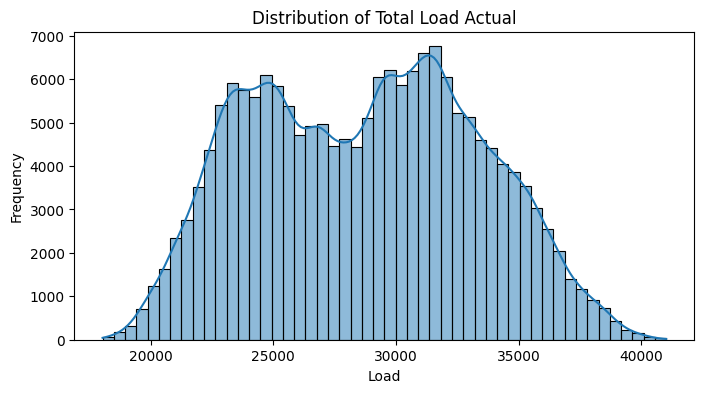

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['total load actual'], bins=50, kde=True)
plt.title("Distribution of Total Load Actual")
plt.xlabel("Load")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-1456188742.py:7: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


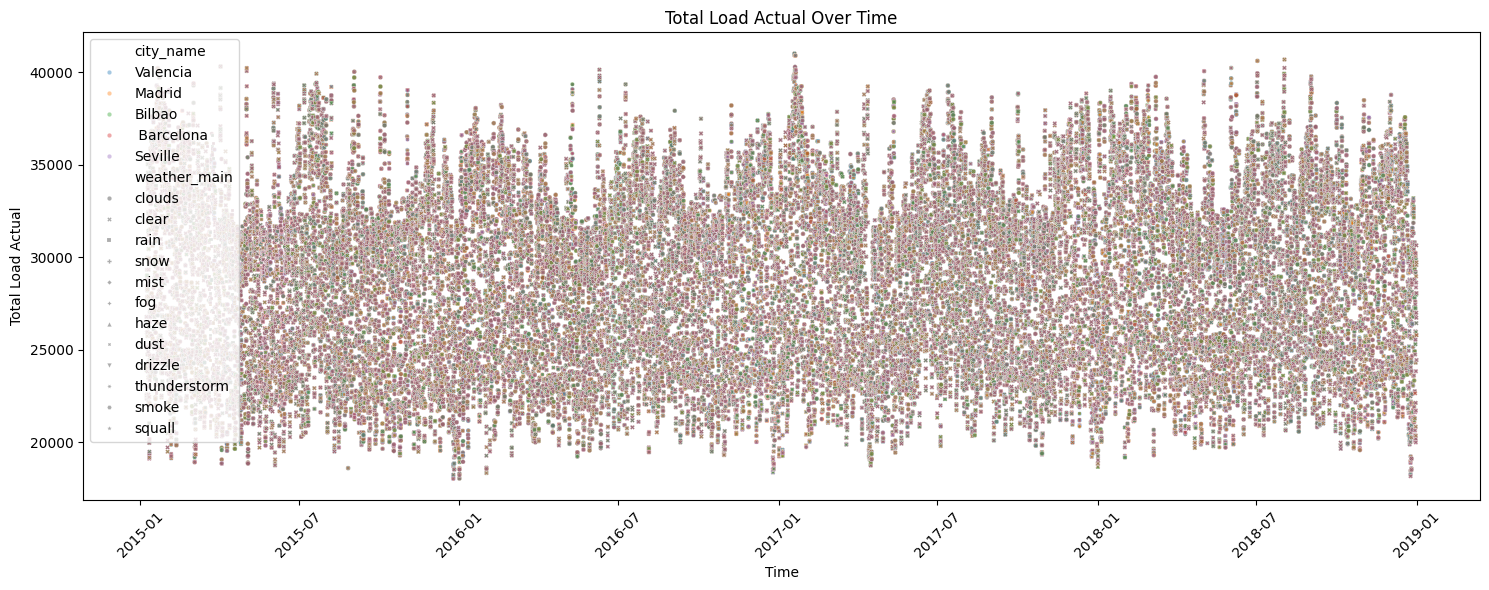

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.index, y='total load actual', data=df, s=10, alpha=0.4, hue = 'city_name', style = 'weather_main')
plt.title('Total Load Actual Over Time')
plt.xlabel('Time')
plt.ylabel('Total Load Actual')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

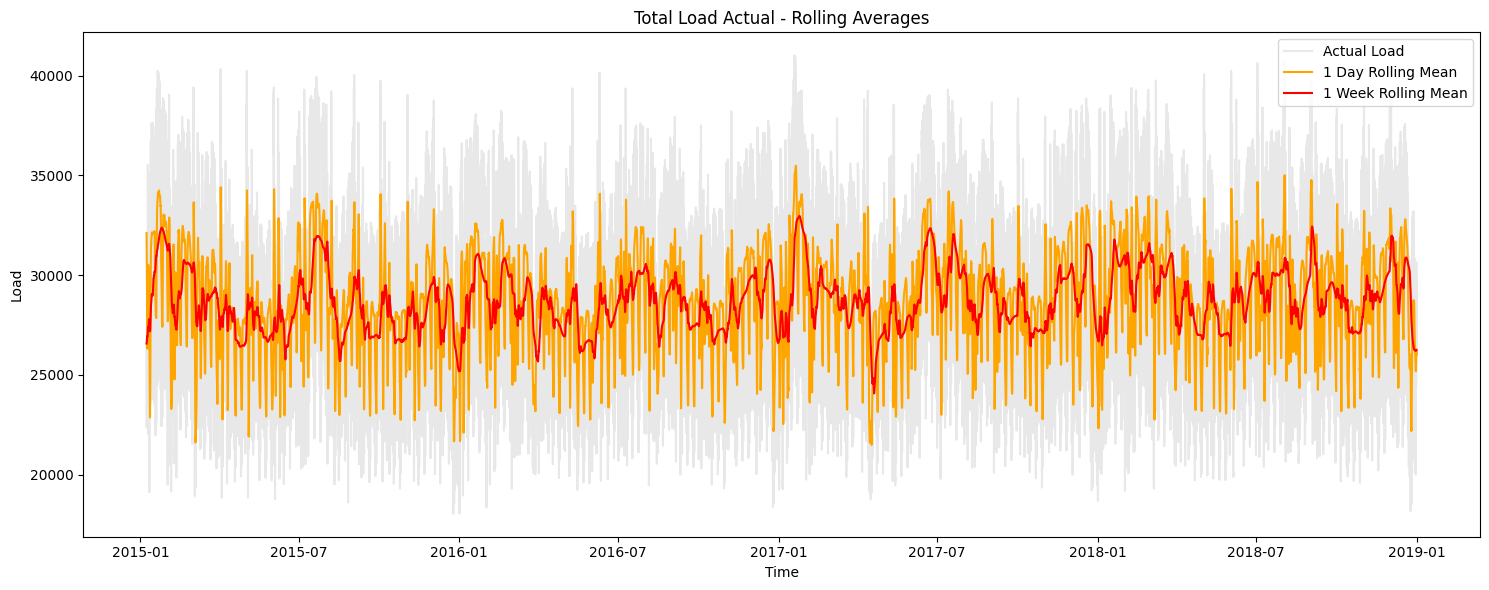

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['total load actual'], color='lightgray', label='Actual Load', alpha=0.5)
plt.plot(df['load_rolling_1d'], label='1 Day Rolling Mean', color='orange')
plt.plot(df['load_rolling_1w'], label='1 Week Rolling Mean', color='red')
plt.title('Total Load Actual - Rolling Averages')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2796169076.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_avg = df['total load actual'].resample('H').mean()
/tmp/ipython-input-2796169076.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['total load actual'].resample('M').mean()


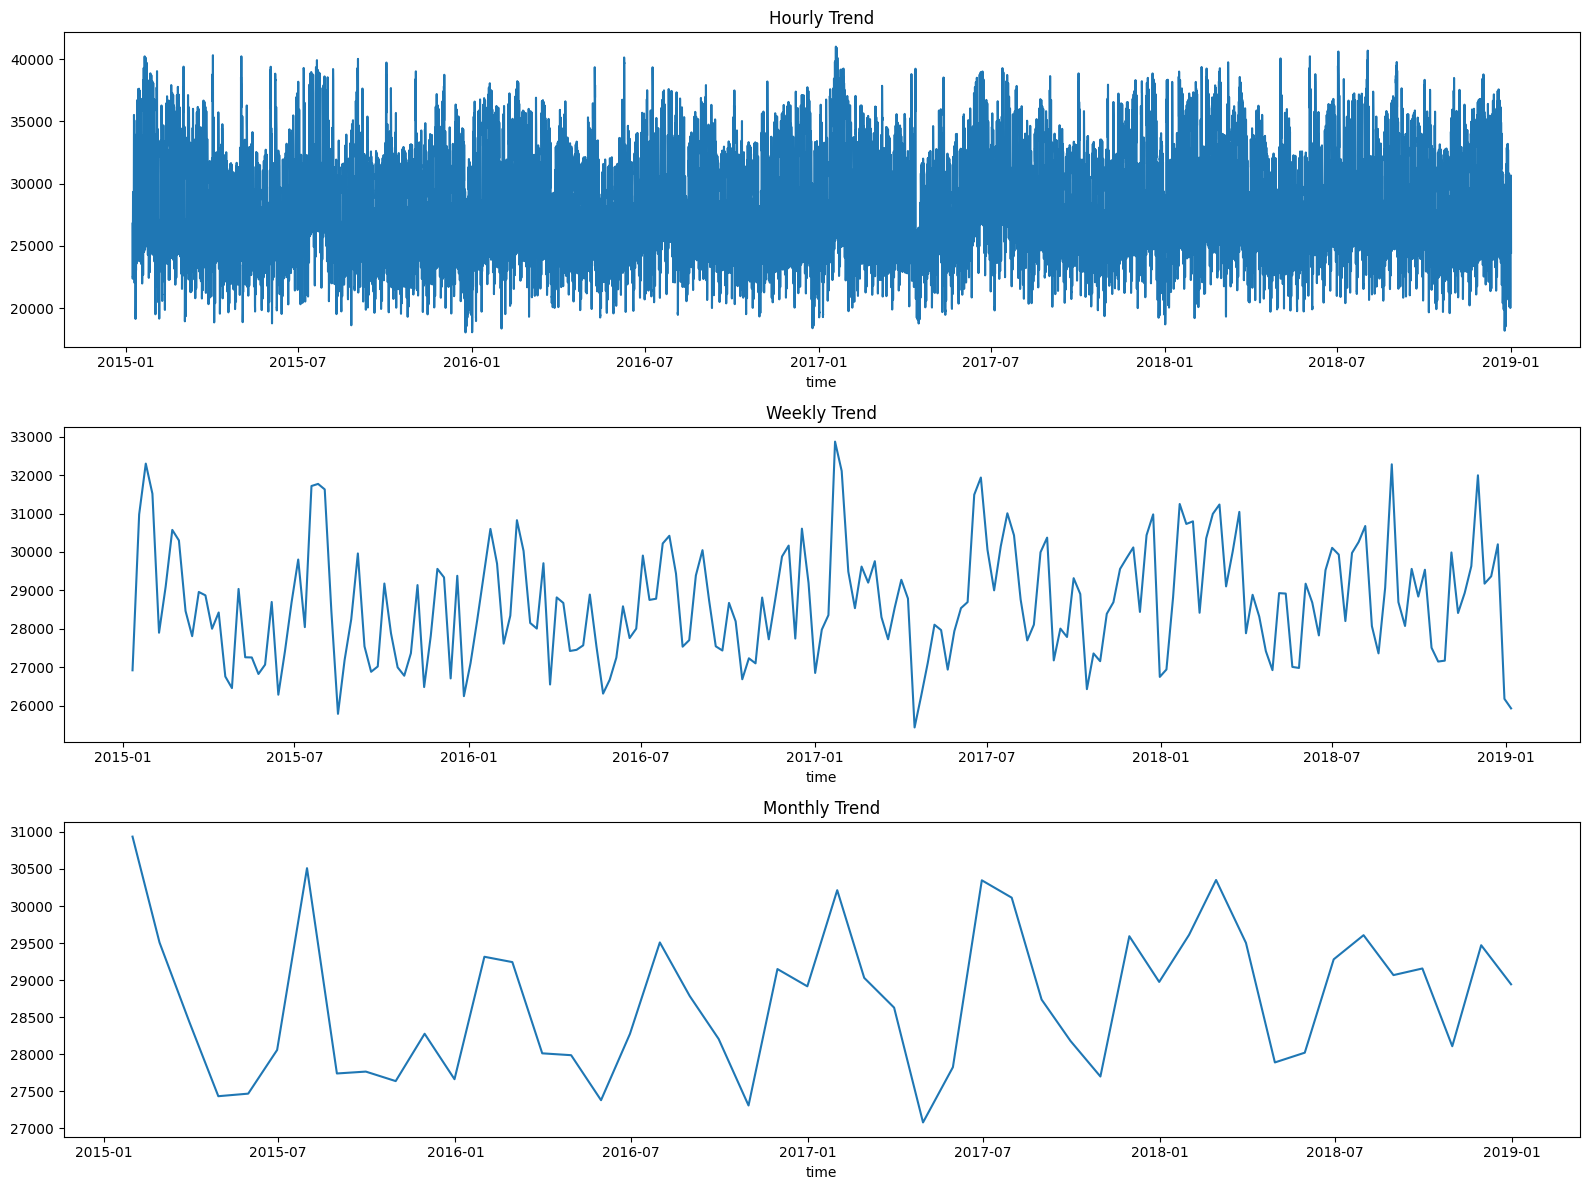

In [ ]:
hourly_avg = df['total load actual'].resample('H').mean()
weekly_avg = df['total load actual'].resample('W').mean()
monthly_avg = df['total load actual'].resample('M').mean()

fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

sns.lineplot(ax=axes[0], x=hourly_avg.index, y=hourly_avg.values)
axes[0].set_title("Hourly Trend")

sns.lineplot(ax=axes[1], x=weekly_avg.index, y=weekly_avg.values)
axes[1].set_title("Weekly Trend")

sns.lineplot(ax=axes[2], x=monthly_avg.index, y=monthly_avg.values)
axes[2].set_title("Monthly Trend")

plt.tight_layout()
plt.show()

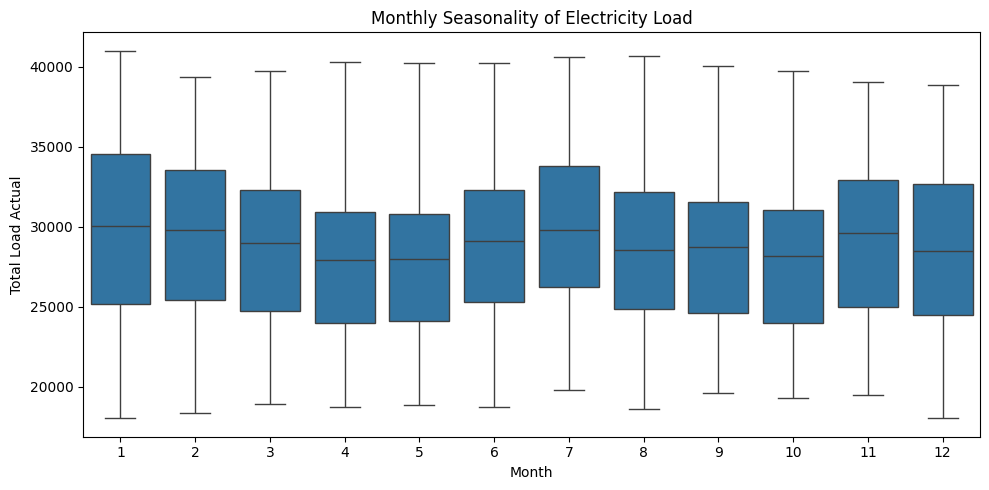

In [ ]:
df['month'] = df.index.month

plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='total load actual', data=df)
plt.title('Monthly Seasonality of Electricity Load')
plt.xlabel('Month')
plt.ylabel('Total Load Actual')
plt.tight_layout()
plt.show()

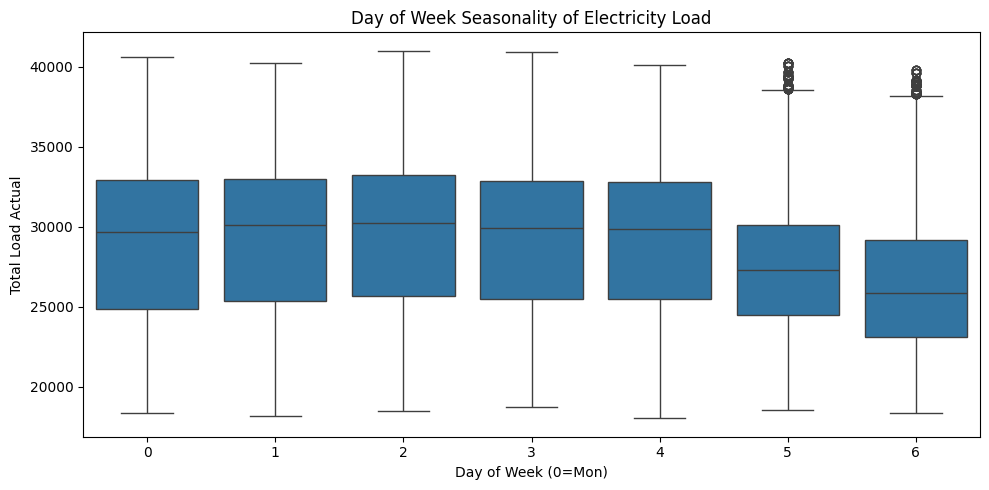

In [ ]:
df['day_of_week'] = df.index.dayofweek

plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_week', y='total load actual', data=df)
plt.title('Day of Week Seasonality of Electricity Load')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Total Load Actual')
plt.tight_layout()
plt.show()

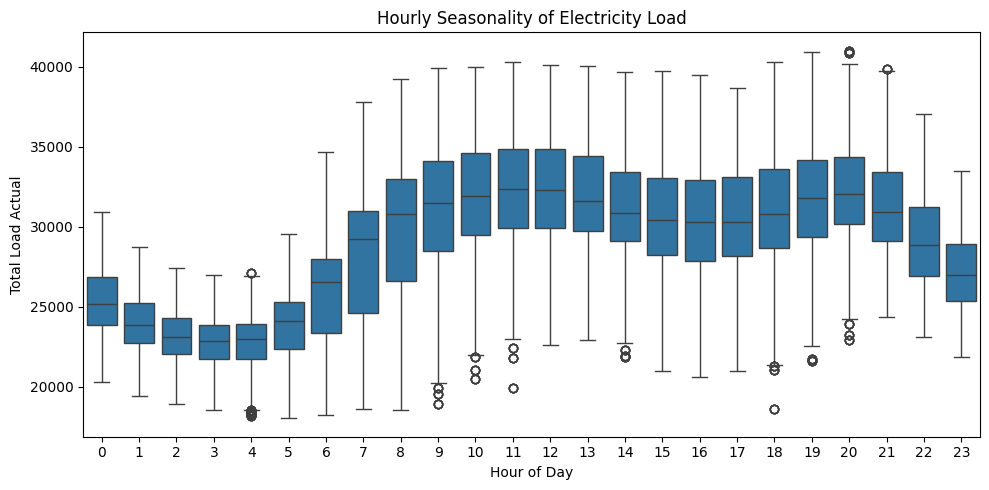

In [ ]:
df['hour'] = df.index.hour

plt.figure(figsize=(10, 5))
sns.boxplot(x='hour', y='total load actual', data=df)
plt.title('Hourly Seasonality of Electricity Load')
plt.xlabel('Hour of Day')
plt.ylabel('Total Load Actual')
plt.tight_layout()
plt.show()

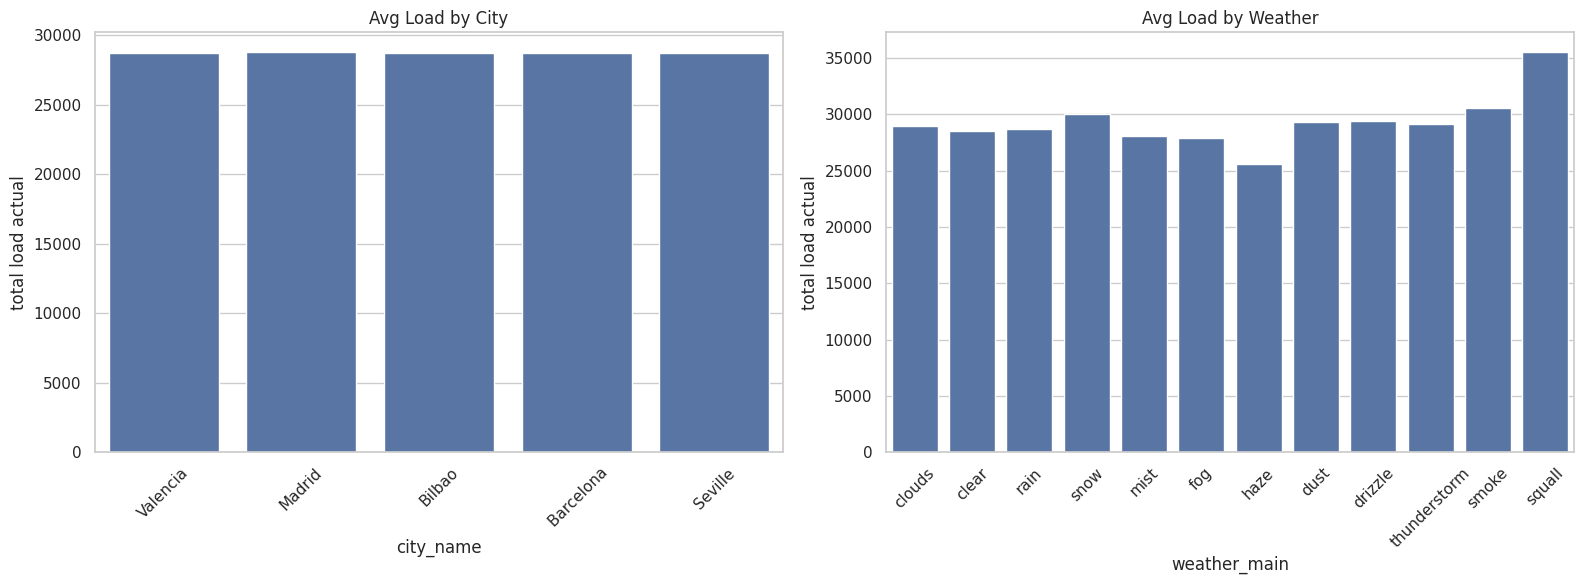

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=df, x='city_name', y='total load actual', ax=axes[0], estimator='mean', errorbar=None)
axes[0].set_title('Avg Load by City')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='weather_main', y='total load actual', ax=axes[1], estimator='mean', errorbar=None)
axes[1].set_title('Avg Load by Weather')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(np.int32)

In [ ]:
df.shape

(177535, 42)

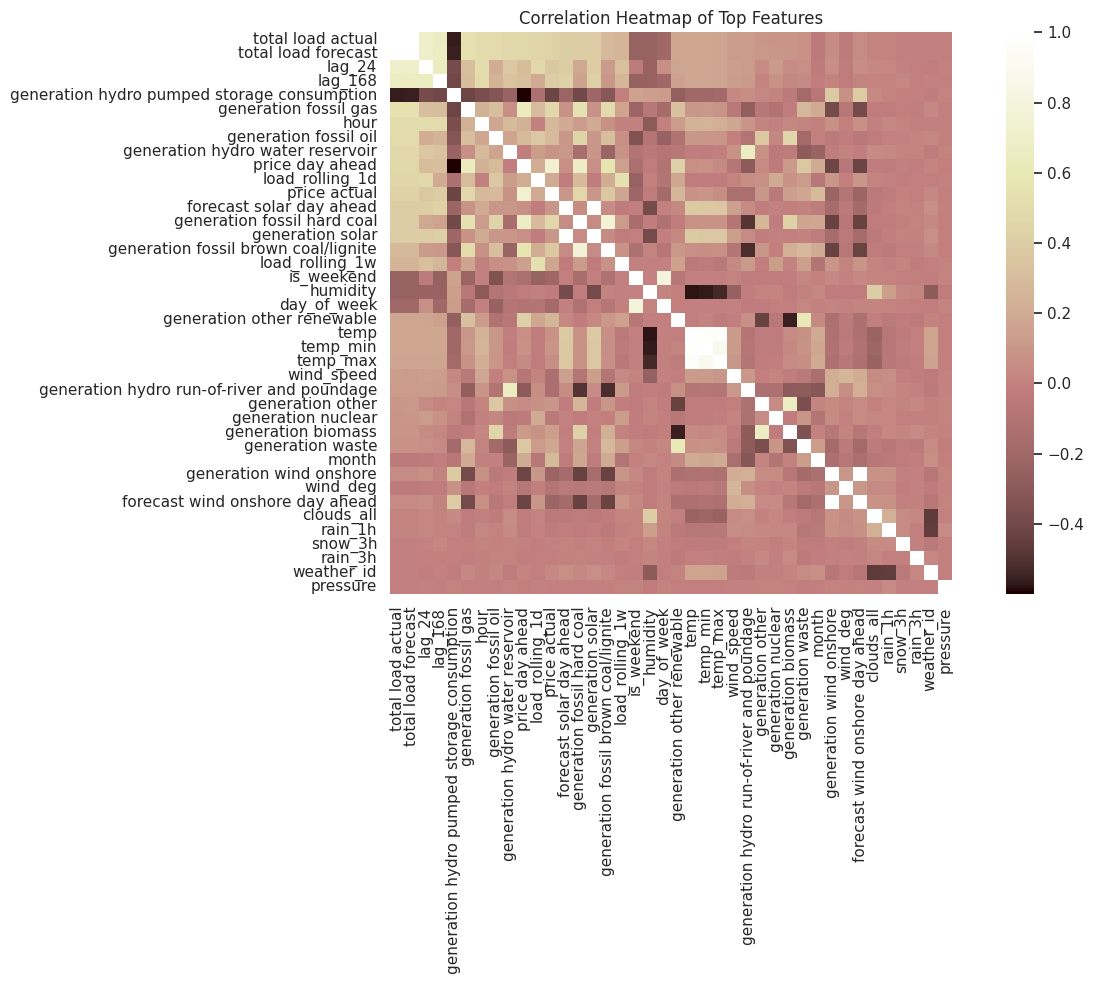

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])

corr_matrix = numeric_df.corr()

target_corr = corr_matrix['total load actual'].abs().sort_values(ascending=False)
top_features = target_corr.index

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix.loc[top_features, top_features], fmt=".2f", cmap='pink', square=True)
plt.title('Correlation Heatmap of Top Features')
plt.tight_layout()
plt.show()

## *Feature Engineering*

In [ ]:
df.corr(numeric_only=True)['total load actual']

generation biomass                             0.082616
generation fossil brown coal/lignite           0.278484
generation fossil gas                          0.549443
generation fossil hard coal                    0.396587
generation fossil oil                          0.496100
generation hydro pumped storage consumption   -0.561591
generation hydro run-of-river and poundage     0.120477
generation hydro water reservoir               0.480610
generation nuclear                             0.086631
generation other                               0.099632
generation other renewable                     0.181415
generation solar                               0.393961
generation waste                               0.074110
generation wind onshore                        0.043029
forecast solar day ahead                       0.402460
forecast wind onshore day ahead                0.040715
total load forecast                            0.995130
total load actual                              1.000000
price day ahead                                0.474244
price actual                                   0.437393
lag_24                                         0.703218
lag_168                                        0.661131
load_rolling_1d                                0.456830
load_rolling_1w                                0.252788
temp                                           0.178653
temp_min                                       0.176936
temp_max                                       0.167719
pressure                                      -0.001016
humidity                                      -0.245113
wind_speed                                     0.125827
wind_deg                                      -0.041403
rain_1h                                        0.012045
rain_3h                                       -0.003197
snow_3h                                       -0.004424
clouds_all                                     0.012391
weather_id                                    -0.001573
month                                         -0.045193
day_of_week                                   -0.196080
hour                                           0.500832
is_weekend                                    -0.248089
Name: total load actual, dtype: float64

In [ ]:
cor_target = df.corr(numeric_only=True)['total load actual'].drop('total load actual')

low_corr_features = cor_target[(cor_target > -0.1) & (cor_target < 0.1)]

print("Features weakly correlated with 'total load actual' (≈ 0):\n")
print(low_corr_features.sort_values())

Features weakly correlated with 'total load actual' (≈ 0):

month                             -0.045193
wind_deg                          -0.041403
snow_3h                           -0.004424
rain_3h                           -0.003197
weather_id                        -0.001573
pressure                          -0.001016
rain_1h                            0.012045
clouds_all                         0.012391
forecast wind onshore day ahead    0.040715
generation wind onshore            0.043029
generation waste                   0.074110
generation biomass                 0.082616
generation nuclear                 0.086631
generation other                   0.099632
Name: total load actual, dtype: float64


In [ ]:
cols_to_drop = [
    'pressure',
    'weather_id',
    'rain_3h',
    'snow_3h',
    'rain_1h',
    'clouds_all',
    'forecast wind onshore day ahead',
    'wind_deg',
    'generation wind onshore'
]

df.drop(columns=cols_to_drop, inplace = True)

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr().abs()

upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]

print("Highly correlated columns (consider removing):", high_corr_features)

high_corr_pairs = upper_triangle.stack().sort_values(ascending=False)
print("\nTop correlated pairs:\n", high_corr_pairs[high_corr_pairs > 0.80])

Highly correlated columns (consider removing): ['forecast solar day ahead', 'total load actual', 'temp_min', 'temp_max']

Top correlated pairs:
 total load forecast  total load actual           0.995130
generation solar     forecast solar day ahead    0.993265
temp                 temp_min                    0.974319
                     temp_max                    0.966471
temp_min             temp_max                    0.891349
dtype: float64


In [ ]:
columns_to_drop = [
    'forecast solar day ahead',
    'temp_min',
    'temp_max',
    'total load forecast',
    'price day ahead'
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [ ]:
df['generation_fossil_total'] = (
    df['generation fossil brown coal/lignite'] +
    df['generation fossil gas'] +
    df['generation fossil hard coal'] +
    df['generation fossil oil']
)

In [ ]:
df['generation_hydro_total'] = (
    df['generation hydro pumped storage consumption'] +
    df['generation hydro run-of-river and poundage'] +
    df['generation hydro water reservoir']
)

In [ ]:
df['generation_other_total'] = (
    df['generation other'] +
    df['generation other renewable']
)

In [ ]:
correlation_targets = df[['generation other',
                          'generation other renewable',
                          'generation solar',
                          'generation_fossil_total',
                          'generation_hydro_total',
                          'generation_other_total',
                          'total load actual']].corr()

print(correlation_targets['total load actual'].sort_values())

generation other              0.099632
generation other renewable    0.181415
generation_hydro_total        0.230282
generation_other_total        0.242109
generation solar              0.393961
generation_fossil_total       0.536082
total load actual             1.000000
Name: total load actual, dtype: float64


In [ ]:
new_df = df.drop(columns=['generation fossil brown coal/lignite',
                          'generation fossil gas',
                          'generation fossil hard coal',
                          'generation fossil oil',
                          'generation hydro pumped storage consumption',
                          'generation hydro run-of-river and poundage',
                          'generation hydro water reservoir',
                          'generation other',
                          'generation other renewable'])

In [ ]:
new_df.shape

(177535, 22)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177535 entries, 2015-01-08 00:00:00 to 2018-12-31 23:00:00
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   generation biomass       177535 non-null  float64
 1   generation nuclear       177535 non-null  float64
 2   generation solar         177535 non-null  float64
 3   generation waste         177535 non-null  float64
 4   total load actual        177535 non-null  float64
 5   price actual             177535 non-null  float64
 6   lag_24                   177535 non-null  float64
 7   lag_168                  177535 non-null  float64
 8   load_rolling_1d          177535 non-null  float64
 9   load_rolling_1w          177535 non-null  float64
 10  city_name                177535 non-null  object 
 11  temp                     177535 non-null  float64
 12  humidity                 177535 non-null  int64  
 13  wind_speed               

## *ML Models*

In [ ]:
df_ml = pd.get_dummies(new_df, columns=['city_name', 'weather_main'], drop_first=True)

In [ ]:
y = df_ml['total load actual']
X = df_ml.drop('total load actual', axis=1)

### Train-Test Split

In [ ]:
split_index = int(len(df_ml) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols = X_train.select_dtypes(include=['int32', 'int64', 'float64']).columns
ohe_cols = X_train.select_dtypes(include='bool').columns

cols_to_scale = [col for col in numeric_cols if col not in ohe_cols]

scaler1 = StandardScaler()
X_train_scaled_part = scaler1.fit_transform(X_train[cols_to_scale])
X_test_scaled_part = scaler1.transform(X_test[cols_to_scale])

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = X_train_scaled_part
X_test_scaled[cols_to_scale] = X_test_scaled_part

scaler2 = StandardScaler()
y_train_scaled = scaler2.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler2.transform(y_test.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Hyperparameter tuning using GridSearchCV

knn = KNeighborsRegressor()

param_grid_knn = {
    'n_neighbors': [3, 11, 19, 27],
    'weights': ['uniform', 'distance']
}

tscv = TimeSeriesSplit(n_splits=3)

grid_knn = GridSearchCV(knn, param_grid_knn, cv=tscv, scoring='r2', verbose=1, n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train_scaled.ravel())

best_knn = grid_knn.best_estimator_

y_pred_knn = best_knn.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test_scaled, y_pred_knn))
r2_knn = r2_score(y_test_scaled, y_pred_knn)

print("Best Params for KNN:", grid_knn.best_params_)
print(f"KNN RMSE: {rmse_knn:.2f}")
print(f"KNN R² Score: {r2_knn:.4f}")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params for KNN: {'n_neighbors': 27, 'weights': 'uniform'}
KNN RMSE: 0.43
KNN R² Score: 0.8104


In [ ]:
knn = KNeighborsRegressor(n_neighbors=27, weights='uniform')
knn.fit(X_train_scaled, y_train_scaled.ravel())
y_pred_scaled = knn.predict(X_test_scaled)

y_pred_knn = scaler2.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler2.inverse_transform(y_test_scaled)

knn_rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_knn))
knn_r2 = r2_score(y_test_orig, y_pred_knn)

print(f"knn RMSE: {knn_rmse:.2f}")
print(f"knn R² Score: {knn_r2:.4f}")

knn RMSE: 1970.61
knn R² Score: 0.8104


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Hyperparameter tuning using GridSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 1, 0.5]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=tscv, scoring='r2', verbose=1, n_jobs=-1)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Params for Random Forest:", grid_rf.best_params_)
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Params for Random Forest: {'max_depth': None, 'max_features': 0.5, 'n_estimators': 100}
Random Forest RMSE: 1502.49
Random Forest R² Score: 0.8898


In [ ]:
rf = RandomForestRegressor(n_estimators=100, max_features=0.5, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"RandomForest RMSE: {rf_rmse:.2f}")
print(f"RandomForest R2 Score: {rf_r2:.4f}")

RandomForest RMSE: 1502.49
RandomForest R2 Score: 0.8898


### Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Hyperparameter tuning using GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid_gbr = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.8, 1.0]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_gbr = GridSearchCV(gbr, param_grid_gbr, cv=tscv, scoring='r2', verbose=1, n_jobs=-1)
grid_gbr.fit(X_train, y_train)

best_gbr = grid_gbr.best_estimator_

y_pred_gbr = best_gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Best Params for Gradient Boosting:", grid_gbr.best_params_)
print(f"Gradient Boosting RMSE: {rmse_gbr:.2f}")
print(f"Gradient Boosting R² Score: {r2_gbr:.4f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Params for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting RMSE: 1374.86
Gradient Boosting R² Score: 0.9077


In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    random_state=42
)

gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting RMSE: {gbr_rmse:.2f}")
print(f"Gradient Boosting R² Score: {gbr_r2:.4f}")

Gradient Boosting RMSE: 1374.86
Gradient Boosting R² Score: 0.9077


### XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
#Hyperparameter tuning using GridSearchCV

xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.08, 0.1, 0.12],
    'max_depth': [3, 5, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'objective': ['reg:squarederror'],
    'n_jobs': [-1]
}

tscv = TimeSeriesSplit(n_splits=3)

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=tscv, scoring='r2', verbose=1, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Best Params for XGBoost:", grid_xgb.best_params_)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.08, 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -1, 'objective': 'reg:squarederror', 'subsample': 1.0}
XGBoost RMSE: 1364.20
XGBoost R² Score: 0.9091


In [ ]:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.08,
    max_depth=8,
    subsample=1.0,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    objective='reg:squarederror'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {xgb_rmse:.2f}")
print(f"XGBoost R² Score: {xgb_r2:.4f}")

XGBoost RMSE: 1364.20
XGBoost R² Score: 0.9091


## *Long Short-Term Memory (LSTM)*

In [ ]:
df_lstm = df_ml.copy()

In [ ]:
df_lstm.shape

(177535, 35)

In [ ]:
df_lstm.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177535 entries, 2015-01-08 00:00:00 to 2018-12-31 23:00:00
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   generation biomass         177535 non-null  float64
 1   generation nuclear         177535 non-null  float64
 2   generation solar           177535 non-null  float64
 3   generation waste           177535 non-null  float64
 4   total load actual          177535 non-null  float64
 5   price actual               177535 non-null  float64
 6   lag_24                     177535 non-null  float64
 7   lag_168                    177535 non-null  float64
 8   load_rolling_1d            177535 non-null  float64
 9   load_rolling_1w            177535 non-null  float64
 10  temp                       177535 non-null  float64
 11  humidity                   177535 non-null  int64  
 12  wind_speed                 177535 non-null  int64  


In [ ]:
y_lstm = df_lstm['total load actual']
X_lstm = df_lstm.drop('total load actual', axis=1)

### Train-Test Split

In [ ]:
split_index = int(len(df_ml) * 0.8)
X_lstm_train, X_lstm_test = X_lstm.iloc[:split_index], X_lstm.iloc[split_index:]
y_lstm_train, y_lstm_test = y_lstm.iloc[:split_index], y_lstm.iloc[split_index:]

### Scaling

In [ ]:
numeric_cols = X_lstm_train.select_dtypes(include=['int32', 'int64', 'float64']).columns
ohe_cols = X_lstm_train.select_dtypes(include='bool').columns

cols_to_scale = [col for col in numeric_cols if col not in ohe_cols]

scaler1_lstm = StandardScaler()
X_lstm_train_scaled_part = scaler1_lstm.fit_transform(X_lstm_train[cols_to_scale])
X_lstm_test_scaled_part = scaler1_lstm.transform(X_lstm_test[cols_to_scale])

X_lstm_train_scaled = X_lstm_train.copy()
X_lstm_test_scaled = X_lstm_test.copy()
X_lstm_train_scaled[cols_to_scale] = X_lstm_train_scaled_part
X_lstm_test_scaled[cols_to_scale] = X_lstm_test_scaled_part

scaler2_lstm = StandardScaler()
y_lstm_train_scaled = scaler2_lstm.fit_transform(y_lstm_train.values.reshape(-1, 1))
y_lstm_test_scaled = scaler2_lstm.transform(y_lstm_test.values.reshape(-1, 1))

### Importing Libraries

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import math

### Data Preprocessing

In [ ]:
def create_sequences(X, y, timesteps):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i+timesteps])
        y_seq.append(y[i+timesteps])
    return np.array(X_seq), np.array(y_seq)

In [ ]:
timesteps = 30

X_train_seq, y_train_seq = create_sequences(X_lstm_train_scaled, y_lstm_train_scaled, timesteps)
X_test_seq, y_test_seq = create_sequences(X_lstm_test_scaled, y_lstm_test_scaled, timesteps)

In [ ]:
X_train_seq.shape

(141998, 30, 34)

### Model Structure

In [ ]:
lstm = Sequential()

lstm.add(LSTM(128, return_sequences=True,
              input_shape=(timesteps, X_train_seq.shape[2]),
              recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
lstm.add(Dropout(0.5))

lstm.add(LSTM(64, return_sequences=False,
              recurrent_dropout=0.1, kernel_regularizer=l2(0.01)))
lstm.add(Dropout(0.4))

lstm.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
lstm.add(Dropout(0.3))

lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
X_train_seq = X_train_seq.astype('float64')
X_test_seq = X_test_seq.astype('float64')

### Model Training

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = lstm.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 247s 135ms/step - loss: 0.7912 - val_loss: 0.1690
Epoch 2/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 278s 144ms/step - loss: 0.1938 - val_loss: 0.1592
Epoch 3/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 262s 144ms/step - loss: 0.1784 - val_loss: 0.1566
Epoch 4/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 259s 142ms/step - loss: 0.1680 - val_loss: 0.1483
Epoch 5/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 251s 136ms/step - loss: 0.1574 - val_loss: 0.1328
Epoch 6/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 264s 137ms/step - loss: 0.1520 - val_loss: 0.1324
Epoch 7/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 264s 138ms/step - loss: 0.1473 - val_loss: 0.1364
Epoch 8/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 247s 139ms/step - loss: 0.1413 - val_loss: 0.1459
Epoch 9/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 262s 139ms/step - loss: 0.1384 - val_loss: 0.1275
Epoch 10/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 259s 138ms/step - loss: 0.1333 - val_loss: 0.1282
Epoch 11/100
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 238s 134ms/step - loss: 0

In [ ]:
y_pred_scaled = lstm.predict(X_test_seq)

y_pred_lstm = scaler2_lstm.inverse_transform(y_pred_scaled)
y_test_inv = scaler2_lstm.inverse_transform(y_test_seq.reshape(-1, 1))

lstm_rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_lstm))
lstm_r2 = r2_score(y_test_inv, y_pred_lstm)

print(f"LSTM RMSE: {lstm_rmse:.2f}")
print(f"LSTM R² Score: {lstm_r2:.4f}")

1109/1109 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step
LSTM RMSE: 964.20
LSTM R² Score: 0.9546


## *Output Visualization*

/tmp/ipython-input-338072618.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette="Blues_r", ax=axes[0])
/tmp/ipython-input-338072618.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_values, palette="Greens_r", ax=axes[1])


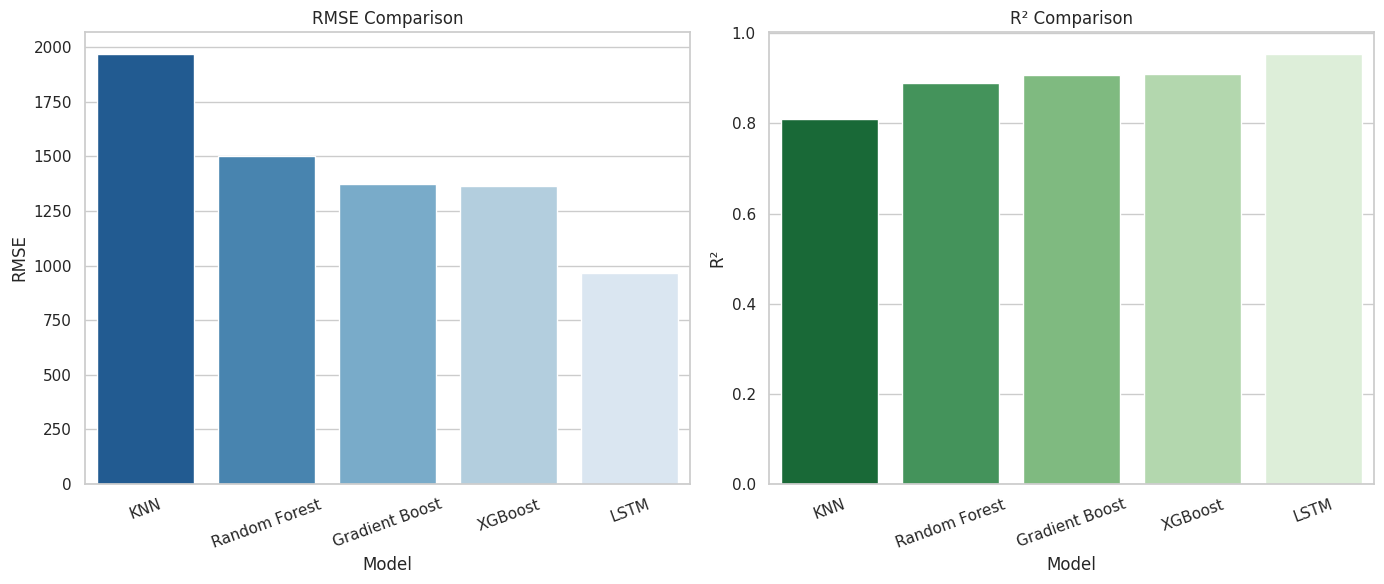

In [ ]:
models = ["KNN", "Random Forest", "Gradient Boost", "XGBoost", "LSTM"]
rmse_values = [knn_rmse, rf_rmse, gbr_rmse, xgb_rmse, lstm_rmse]
r2_values   = [knn_r2, rf_r2, gbr_r2, xgb_r2, lstm_r2]

fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.barplot(x=models, y=rmse_values, palette="Blues_r", ax=axes[0])
axes[0].set_title("RMSE Comparison")
axes[0].set_ylabel("RMSE")
axes[0].set_xlabel("Model")
axes[0].tick_params(axis='x', rotation=20)

sns.barplot(x=models, y=r2_values, palette="Greens_r", ax=axes[1])
axes[1].set_title("R² Comparison")
axes[1].set_ylabel("R²")
axes[1].set_xlabel("Model")
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

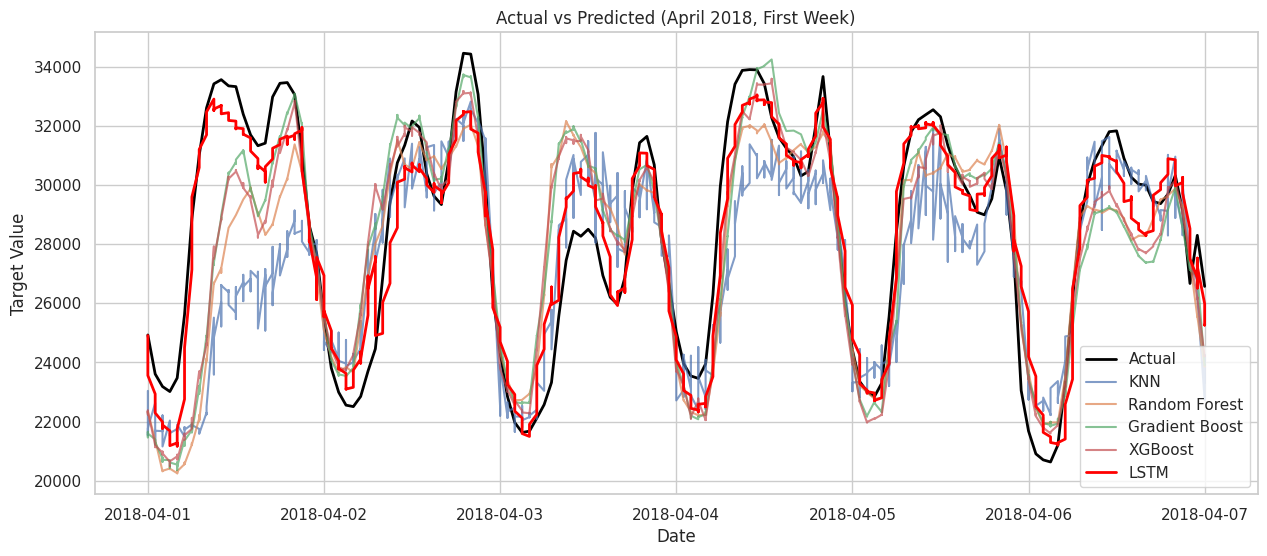

In [ ]:
start_date = "2018-04-01"
end_date   = "2018-04-07"

mask = (y_test.index >= start_date) & (y_test.index <= end_date)

y_pred_lstm_flat = y_pred_lstm.ravel()

lstm_index = y_test.index[-len(y_pred_lstm_flat):]

mask_lstm = (lstm_index >= start_date) & (lstm_index <= end_date)

plt.figure(figsize=(15,6))

plt.plot(y_test.loc[mask].index, y_test.loc[mask], label="Actual", color="black", linewidth=2)

plt.plot(X_test.loc[mask].index, y_pred_knn[mask], label="KNN", alpha=0.7)
plt.plot(X_test.loc[mask].index, y_pred_rf[mask], label="Random Forest", alpha=0.7)
plt.plot(X_test.loc[mask].index, y_pred_gbr[mask], label="Gradient Boost", alpha=0.7)
plt.plot(X_test.loc[mask].index, y_pred_xgb[mask], label="XGBoost", alpha=0.7)

plt.plot(lstm_index[mask_lstm], y_pred_lstm_flat[mask_lstm], label="LSTM", color="red", linewidth=2)

plt.title("Actual vs Predicted (April 2018, First Week)")
plt.xlabel("Date")
plt.ylabel("Target Value")
plt.legend()
plt.show()

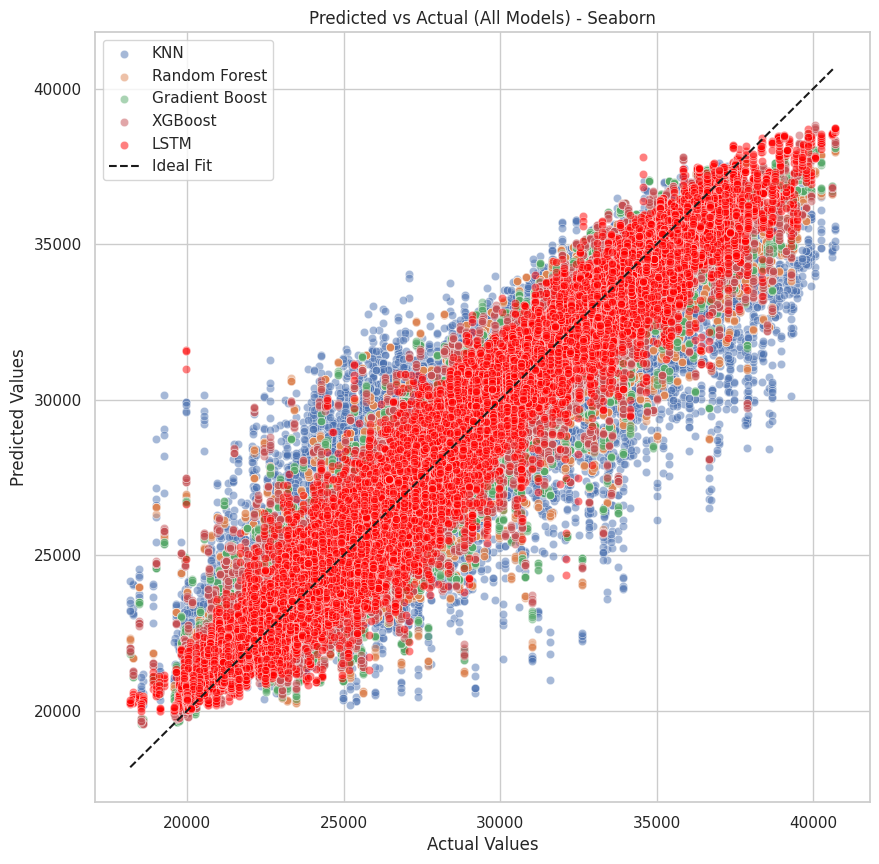

In [ ]:
y_pred_knn = np.ravel(y_pred_knn)
y_pred_rf = np.ravel(y_pred_rf)
y_pred_gbr = np.ravel(y_pred_gbr)
y_pred_xgb = np.ravel(y_pred_xgb)
y_pred_lstm_flat = np.ravel(y_pred_lstm)

y_test_lstm = y_test[-len(y_pred_lstm_flat):]

results_df = pd.DataFrame({
    "y_test": y_test,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf,
    "Gradient Boost": y_pred_gbr,
    "XGBoost": y_pred_xgb
})

results_df_lstm = pd.DataFrame({
    "y_test": y_test_lstm,
    "LSTM": y_pred_lstm_flat
})

plt.figure(figsize=(10,10))
sns.scatterplot(x="y_test", y="KNN", data=results_df, alpha=0.5, label="KNN")
sns.scatterplot(x="y_test", y="Random Forest", data=results_df, alpha=0.5, label="Random Forest")
sns.scatterplot(x="y_test", y="Gradient Boost", data=results_df, alpha=0.5, label="Gradient Boost")
sns.scatterplot(x="y_test", y="XGBoost", data=results_df, alpha=0.5, label="XGBoost")
sns.scatterplot(x="y_test", y="LSTM", data=results_df_lstm, alpha=0.5, label="LSTM", color="red")

plt.plot([min_val, max_val], [min_val, max_val], 'k--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (All Models) - Seaborn")
plt.legend()
plt.show()

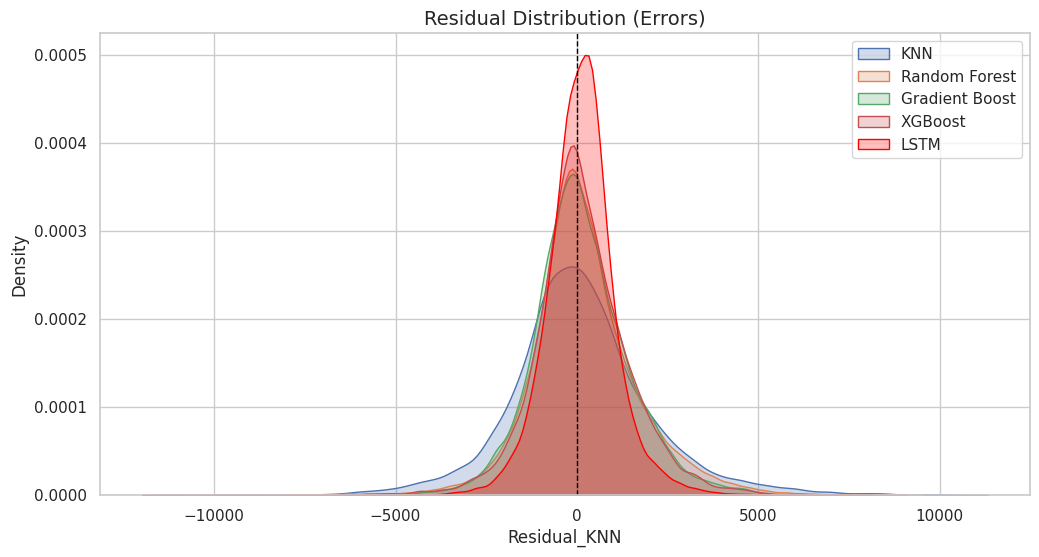

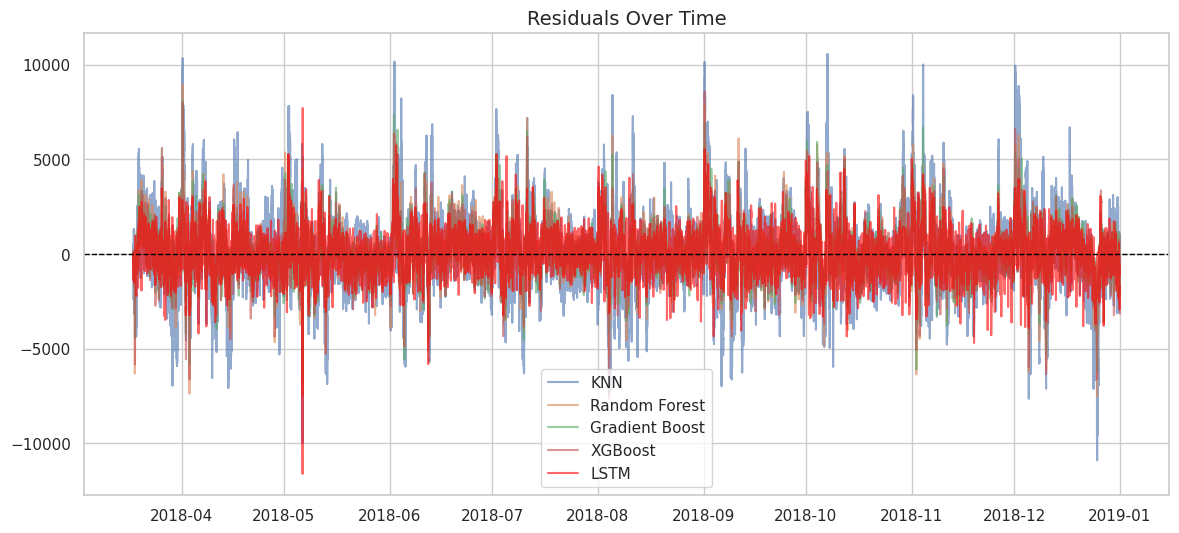

In [ ]:
min_len = min(len(y_pred_knn), len(y_pred_rf), len(y_pred_gbr), len(y_pred_xgb), len(y_pred_lstm.ravel()))

y_test_aligned = y_test[-min_len:]

y_pred_knn_aligned = y_pred_knn[-min_len:]
y_pred_rf_aligned = y_pred_rf[-min_len:]
y_pred_gbr_aligned = y_pred_gbr[-min_len:]
y_pred_xgb_aligned = y_pred_xgb[-min_len:]
y_pred_lstm_aligned = y_pred_lstm.ravel()[-min_len:]

residuals_df = pd.DataFrame({
    "time": y_test_aligned.index,
    "Residual_KNN": y_test_aligned.values - y_pred_knn_aligned,
    "Residual_RF": y_test_aligned.values - y_pred_rf_aligned,
    "Residual_GBR": y_test_aligned.values - y_pred_gbr_aligned,
    "Residual_XGB": y_test_aligned.values - y_pred_xgb_aligned,
    "Residual_LSTM": y_test_aligned.values - y_pred_lstm_aligned
})

plt.figure(figsize=(12,6))
sns.kdeplot(residuals_df["Residual_KNN"], label="KNN", fill=True)
sns.kdeplot(residuals_df["Residual_RF"], label="Random Forest", fill=True)
sns.kdeplot(residuals_df["Residual_GBR"], label="Gradient Boost", fill=True)
sns.kdeplot(residuals_df["Residual_XGB"], label="XGBoost", fill=True)
sns.kdeplot(residuals_df["Residual_LSTM"], label="LSTM", fill=True, color="red")
plt.axvline(0, color="black", linestyle="--", lw=1)
plt.title("Residual Distribution (Errors)", fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(residuals_df["time"], residuals_df["Residual_KNN"], label="KNN", alpha=0.6)
plt.plot(residuals_df["time"], residuals_df["Residual_RF"], label="Random Forest", alpha=0.6)
plt.plot(residuals_df["time"], residuals_df["Residual_GBR"], label="Gradient Boost", alpha=0.6)
plt.plot(residuals_df["time"], residuals_df["Residual_XGB"], label="XGBoost", alpha=0.6)
plt.plot(residuals_df["time"], residuals_df["Residual_LSTM"], label="LSTM", alpha=0.6, color="red")
plt.axhline(0, color="black", linestyle="--", lw=1)
plt.title("Residuals Over Time", fontsize=14)
plt.legend()
plt.show()

## *Model Comparison*

In [ ]:
results = {
    "Model": ["KNN", "Random Forest", "Gradient Boosting", "XGBoost", "LSTM"],
    "RMSE": [knn_rmse, rf_rmse, gbr_rmse, xgb_rmse, lstm_rmse],
    "R2": [knn_r2, rf_r2, gbr_r2, xgb_r2, lstm_r2]
}

results_df = pd.DataFrame(results)

results_df["RMSE_Rank"] = results_df["RMSE"].rank(ascending=True)
results_df["R2_Rank"] = results_df["R2"].rank(ascending=False)

results_df["Overall_Rank"] = results_df[["RMSE_Rank", "R2_Rank"]].mean(axis=1)

results_df = results_df.sort_values("Overall_Rank").reset_index(drop=True)

print(results_df)

               Model         RMSE        R2  RMSE_Rank  R2_Rank  Overall_Rank
0               LSTM   964.195566  0.954649        1.0      1.0           1.0
1            XGBoost  1364.202578  0.909145        2.0      2.0           2.0
2  Gradient Boosting  1374.864681  0.907719        3.0      3.0           3.0
3      Random Forest  1502.491558  0.889791        4.0      4.0           4.0
4                KNN  1970.608840  0.810420        5.0      5.0           5.0


## *Model Save*

In [ ]:
import joblib

joblib.dump(knn, "knn_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(gbr, "gradient_boosting_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")

lstm.save("lstm_model.keras")

print("All models saved successfully in Colab working directory!")

All models saved successfully in Colab working directory!


## *Conclusion*

In this project, we applied multiple machine learning and deep learning models — KNN, Random Forest, Gradient Boosting, XGBoost and LSTM — to forecast energy consumption.

* The results showed that the LSTM model performed best overall, achieving the lowest RMSE (≈964) and the highest R² score (≈0.95).

* Among traditional machine learning methods, XGBoost and Gradient Boosting performed reasonably well but still lagged behind LSTM.

* Random Forest and especially KNN showed comparatively weaker performance, highlighting their limitations in handling the temporal and sequential dependencies of time-series data.

These results suggest that deep learning models like LSTM are better suited for capturing temporal dynamics in energy consumption forecasting, whereas boosting-based methods, while powerful, may not fully exploit sequential patterns without engineered lag features.